# This is an assortment of things I've commonly wanted to do

### Let's get some data

In [13]:
import numpy as np
import pandas as pd

In [14]:
precip_table_data = pd.read_csv('pandas/precip_data.csv')
print(precip_table_data)

               region        subregion                 station abbreviation  \
0         NORTH COAST      SMITH RIVER  Gasquet Ranger Station          GAS   
1         NORTH COAST      SMITH RIVER  Gasquet Ranger Station          GAS   
2         NORTH COAST      SMITH RIVER  Gasquet Ranger Station          GAS   
3         NORTH COAST      SMITH RIVER  Gasquet Ranger Station          GAS   
4         NORTH COAST      SMITH RIVER  Gasquet Ranger Station          GAS   
5         NORTH COAST      SMITH RIVER  Gasquet Ranger Station          GAS   
6         NORTH COAST      SMITH RIVER  Gasquet Ranger Station          GAS   
7         NORTH COAST      SMITH RIVER  Gasquet Ranger Station          GAS   
8         NORTH COAST      SMITH RIVER  Gasquet Ranger Station          GAS   
9         NORTH COAST      SMITH RIVER  Gasquet Ranger Station          GAS   
10        NORTH COAST      SMITH RIVER  Gasquet Ranger Station          GAS   
11        NORTH COAST      SMITH RIVER  Gasquet Rang

#### Read in using Pandas read_csv file

In [15]:
from datetime import datetime
def convert_date_to_fractional_year(month, year):    
    '''
    Given a month and a year, convert to fractional year
    Inputs:
        month: str
            3 letter month of year
        year : int
            4 digit year
    '''
    date = datetime.strptime('{} {}'.format(month, year), '%b %Y')
    fractional_year = float(date.year) + float(date.month)/12.0
    return fractional_year


In [16]:
#Convert all dates to fractional year
date = []
for month, year in zip(precip_table_data.month, precip_table_data.year):
    date.append(convert_date_to_fractional_year(month, year))

precip_table_data['date'] = date

## Now we can plot

In [17]:
#Set plotting backend and put plots in the notebook
%matplotlib inline

In [18]:
from matplotlib import pyplot

### Most basic plot of monthly precipitation from Gasquet Station

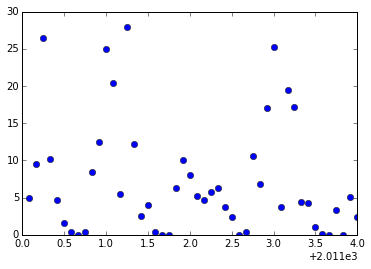

In [19]:
whr = (precip_table_data.abbreviation == 'GAS') & (precip_table_data.year > 2010)
pyplot.plot(precip_table_data.date[whr], precip_table_data.precip[whr], 'o')

### Plot with figure and subplot objects, axis labels, title, set ylimits

(-5, 30)

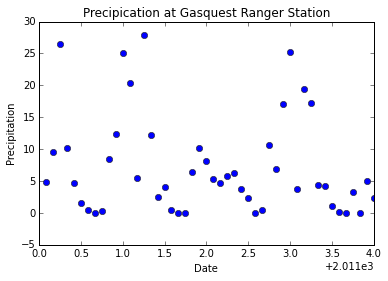

In [20]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
pyplot.plot(precip_table_data.date[whr], precip_table_data.precip[whr], 'o')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation')
ax.set_title('Precipication at Gasquest Ranger Station')
ax.set_ylim(-5, 30)

## Make X Axis Pretty

This is from Justin Ely's package <a href = "https://github.com/justincely/astroraf">astroraf</a>

In [21]:
def format_axis(precision='%.1f',ticksize=1,axis=None,which='both'):
    """
    from matplotlib.ticker import *
    formats axis label precision

    """

    import matplotlib.pyplot as plt
    from matplotlib.ticker import FormatStrFormatter

    if not axis:
        axis = plt.gca()

    if which in ('x','X','both'):
        axis.xaxis.set_major_formatter(FormatStrFormatter(precision))
    if which in ('y','Y','both'):
        axis.yaxis.set_major_formatter(FormatStrFormatter(precision))

(-5, 30)

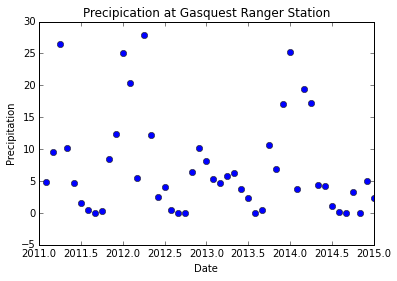

In [22]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(precip_table_data.date[whr], precip_table_data.precip[whr], 'o')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation')
ax.set_title('Precipication at Gasquest Ranger Station')
#---------
format_axis(which = 'x', axis = ax)
#---------
ax.set_ylim(-5, 30)

## Changing tick locations

(-5, 30)

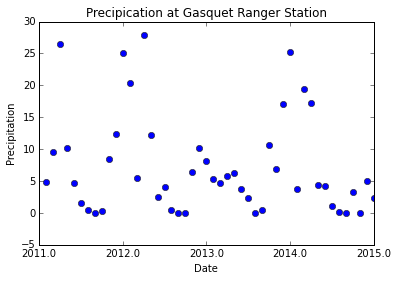

In [23]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(precip_table_data.date[whr], precip_table_data.precip[whr], 'o')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation')
ax.set_title('Precipication at Gasquet Ranger Station')
format_axis(which = 'x', axis = ax)
#---------
new_xticks = np.arange(2011.0, 2016.0)
ax.set_xticks(new_xticks)
#---------
ax.set_ylim(-5, 30)

## Changing tick labels

(-5, 30)

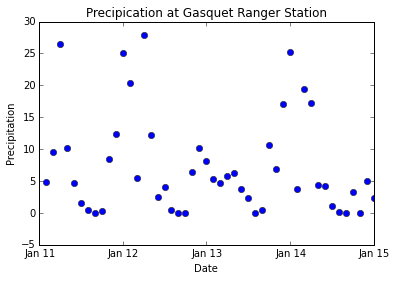

In [24]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(precip_table_data.date[whr], precip_table_data.precip[whr], 'o')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation')
ax.set_title('Precipication at Gasquet Ranger Station')
format_axis(which = 'x', axis = ax)
new_xticks = np.arange(2011.0, 2016.0)
ax.set_xticks(new_xticks)
#---------
new_tick_labels = ['Jan 11', 'Jan 12', 'Jan 13', 'Jan 14', 'Jan 15']
ax.set_xticklabels(new_tick_labels)
#---------
ax.set_ylim(-5, 30)

## Multipage PDF

In [25]:
#---------
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage.pdf')
#---------
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(precip_table_data.date[whr], precip_table_data.precip[whr], 'o')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation')
ax.set_title('Precipication at Gasquet Ranger Station')
format_axis(which = 'x', axis = ax)
ax.set_ylim(-5, 30)
#---------
pp.savefig()
pyplot.close()
#---------

fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
whr = precip_table_data.abbreviation == 'IMP'
ax.plot(precip_table_data.date[whr], precip_table_data.precip[whr], 'o')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation')
ax.set_title('Precipication at Imperial Valley')
format_axis(which = 'x', axis = ax)
ax.set_ylim(-5, 30)
#---------
pp.savefig()
pyplot.close()
pp.close()
#---------

## Adjust Subplot sizes and locations

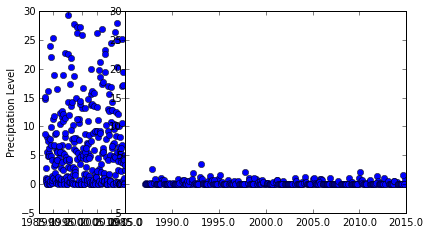

In [35]:
fig = pyplot.figure()
#---------
ax1 = fig.add_subplot(2,1,1) 
#---------
whr = precip_table_data.abbreviation == 'GAS'
ax1.plot(precip_table_data.date[whr], precip_table_data.precip[whr], 'o')
format_axis(which = 'x', axis = ax1)
ax1.set_ylabel('Preciptation Level')
ax1.set_ylim(-5, 30)
#---------
ax1.set_position([0, 0, 0.2, 0.7]) #[left, bottom, width, height]
#---------

#---------
ax2 = fig.add_subplot(2, 1, 2)
#---------
whr = precip_table_data.abbreviation == 'IMP'
ax2.plot(precip_table_data.date[whr], precip_table_data.precip[whr], 'o')
format_axis(which = 'x', axis = ax2)
ax2.set_ylim(-5, 30)
#---------
ax2.set_position([0.2, 0, 0.65, 0.7])
#---------

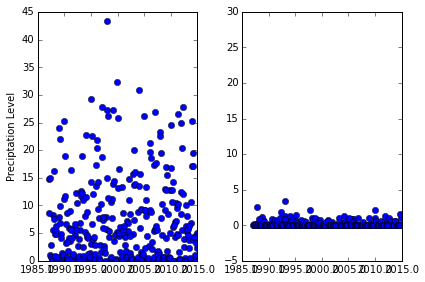

In [34]:
fig = pyplot.figure()
#---------
ax1 = fig.add_subplot(1,2,1) 
#---------
whr = precip_table_data.abbreviation == 'GAS'
ax1.plot(precip_table_data.date[whr], precip_table_data.precip[whr], 'o')
format_axis(which = 'x', axis = ax1)
ax1.set_ylabel('Preciptation Level')
#---------
#---------

#---------
ax2 = fig.add_subplot(1, 2, 2)
#---------
whr = precip_table_data.abbreviation == 'IMP'
ax2.plot(precip_table_data.date[whr], precip_table_data.precip[whr], 'o')
format_axis(which = 'x', axis = ax2)
ax2.set_ylim(-5, 30)
#---------
#---------
pyplot.savefig('myplot.pdf', format = 'pdf')

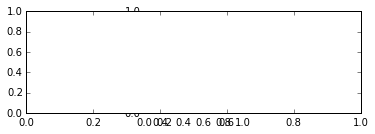

In [37]:
fig = pyplot.figure()
ax1 = fig.add_subplot(2, 3, 2)
ax2 = fig.add_subplot(2,1, 1)

(<matplotlib.figure.Figure at 0x10980bcd0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x109f1bd50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10af8cb90>], dtype=object))

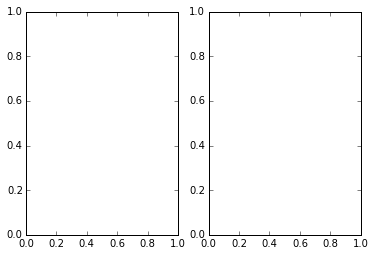

In [39]:
pyplot.subplots(1, 2)